# **Referencias**
- Plotando os dados: https://minerandodados.com.br/plotando-graficos-de-forma-facil-com-python/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np  
from scipy.stats import norm

# **Dados sobre o pld**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/luk3mn/TCC-predicao-de-series-temporais/master/dataset/pld_norte.csv')
df

In [ ]:
# Convertendo a coluna "Data" em datetime
df['Inicio Semana'] = pd.to_datetime(df['Inicio Semana'])

# Tranformando a coluna "Data" em index
df.set_index('Inicio Semana', inplace=True)

# Convertendo os formatos numericos de "," para "."
df['Preço Médio'] = df['Preço Médio'].apply(lambda x: str(x).replace(",","."))
df['Preço Pesado'] = df['Preço Pesado'].apply(lambda x: str(x).replace(",","."))
df['Preço Leve'] = df['Preço Leve'].apply(lambda x: str(x).replace(",","."))

df['Geração Hidráulica'] = df['Geração Hidráulica'].apply(lambda x: str(x).replace(",","."))
df['Geração Térmica'] = df['Geração Térmica'].apply(lambda x: str(x).replace(",","."))

df['Carga de Energia'] = df['Carga de Energia'].apply(lambda x: str(x).replace(",","."))

df['Reservatório EARM (%)'] = df['Reservatório EARM (%)'].apply(lambda x: str(x).replace(",","."))
df['Reservatório ENA (%)'] = df['Reservatório ENA (%)'].apply(lambda x: str(x).replace(",","."))

# Convertendo tudo pra float
df['Preço Médio'] = df['Preço Médio'].astype(float)
df['Preço Pesado'] = df['Preço Pesado'].astype(float)
df['Preço Leve'] = df['Preço Leve'].astype(float)

df['Geração Hidráulica'] = df['Geração Hidráulica'].astype(float)
df['Geração Térmica'] = df['Geração Térmica'].astype(float)

df['Carga de Energia'] = df['Carga de Energia'].astype(float)

df['Reservatório EARM (%)'] = df['Reservatório EARM (%)'].astype(float)
df['Reservatório ENA (%)'] = df['Reservatório ENA (%)'].astype(float)

# exibindo os tipos
df.info()

In [ ]:
df.head()

# **Análise exploratória dos dados**

> Visualização dos dados

Text(0.5, 0, 'Anos')

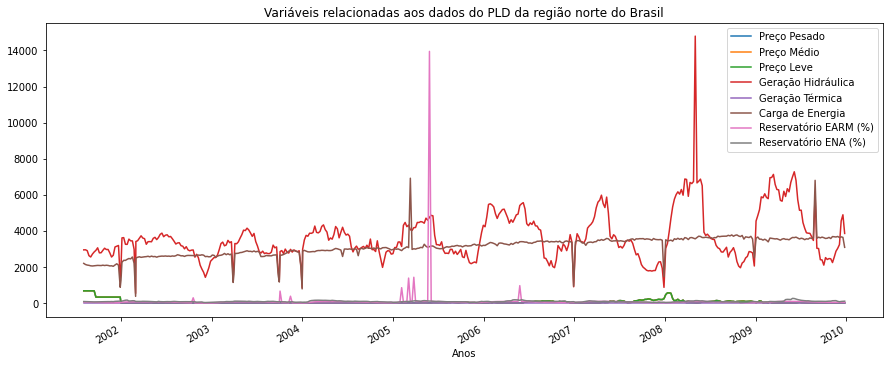

In [5]:
#@title
df.plot(figsize=(15, 6))
plt.title('Variáveis relacionadas aos dados do PLD da região norte do Brasil')
plt.xlabel('Anos')

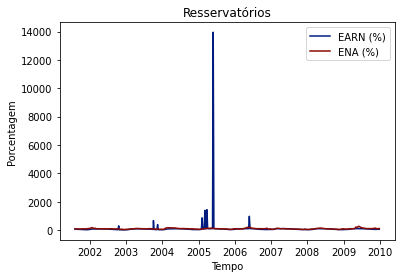

In [ ]:
# Corrigir o eixo y
plt.plot(df['Reservatório EARM (%)'], color='b')
plt.plot(df['Reservatório ENA (%)'], color='r')

plt.title('Resservatórios')
plt.ylabel('Porcentagem')
plt.xlabel('Tempo')

# Legenda
plt.legend(['EARN (%)','ENA (%)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


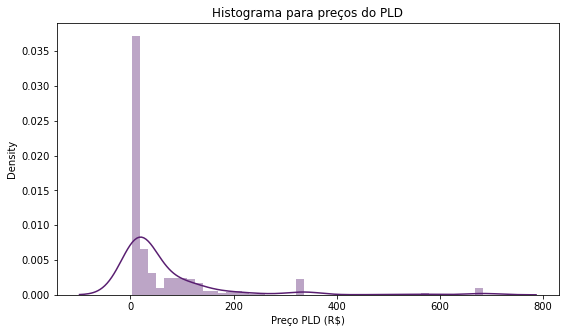

In [ ]:
sns.set_color_codes(palette='dark')

f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(df['Preço Médio'], color="m", axlabel='Preço PLD (R$)')
ax.set(title="Histograma para preços do PLD")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 443 entries, 2001-08-04 to 2009-12-26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Preço Pesado           443 non-null    float64
 1   Preço Médio            443 non-null    float64
 2   Preço Leve             443 non-null    float64
 3   Geração Hidráulica     443 non-null    float64
 4   Geração Térmica        443 non-null    float64
 5   Carga de Energia       443 non-null    float64
 6   Reservatório EARM (%)  443 non-null    float64
 7   Reservatório ENA (%)   443 non-null    float64
dtypes: float64(8)
memory usage: 31.1 KB


> Avaliando a estacionariedade da serie:
- Teste de estacionariedade - Teste de Dickey Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #media movel
    rolstd = timeseries.rolling(12).std() #desvio movel

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Média móvel & desvio padrão')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados do teste de Dickey-Fuller')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado ','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

In [ ]:
def ehEstacionaria(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado ','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    
    if(dfoutput['Estatística do teste'] < dfoutput['Valor crítico (5%)'] and dfoutput['p-value'] < 0.05):
        print('É estacionária.')
    else:
        print('Não é estacionária.')

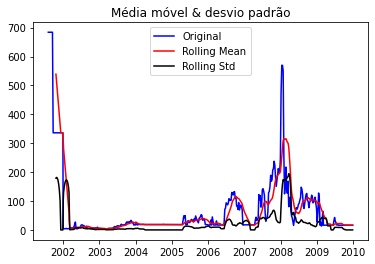

Resultados do teste de Dickey-Fuller
Estatística do teste                     -4.433052
p-value                                   0.000259
O critério de informação maximizado      16.000000
Número de observações usadas            426.000000
Valor crítico (1%)                       -3.445794
Valor crítico (5%)                       -2.868349
Valor crítico (10%)                      -2.570397
dtype: float64


In [ ]:
test_stationarity(df['Preço Pesado'])

In [ ]:
ehEstacionaria(df['Preço Pesado'])

É estacionária.


> Tornando uma série estacionária

In [ ]:
dfdiff = df['Preço Pesado'].diff()
dfdiff = dfdiff.dropna()
plt.title("Preço semanal médio do PLD")
dfdiff.plot()
plt.show()

In [ ]:
# Novo teste de estacionariedade
test_stationarity(dfdiff)

In [ ]:
# Novo teste estatístico
ehEstacionaria(dfdiff)

# **Pré-processamento dos dados**


> Normalização



In [ ]:
def normalizar(data_set):
  norms=[]
  minimo = np.min(data_set)
  maximo = np.max(data_set)
  
  for data in data_set:
    x = (data - minimo)/(maximo - minimo)
    norms.append(x)


  return norms

In [ ]:
df['Preço Leve'] = normalizar(df['Preço Leve'])
df['Preço Médio'] = normalizar(df['Preço Médio'])
df['Preço Pesado'] = normalizar(df['Preço Pesado'])

df['Geração Hidráulica'] = normalizar(df['Geração Hidráulica'])

df['Carga de Energia'] = normalizar(df['Carga de Energia'])

df['Reservatório EARM (%)'] = normalizar(df['Reservatório EARM (%)'])
df['Reservatório ENA (%)'] = normalizar(df['Reservatório ENA (%)'])


In [ ]:
df.head()

,Preço Pesado,Preço Médio,Preço Leve,Geração Hidráulica,Geração Térmica,Carga de Energia,Reservatório EARM (%),Reservatório ENA (%)
Inicio Semana,,,,,,,,
2001-08-04,1.0,1.0,1.0,0.169282,0.0,0.279195,0.003852,0.248140
2001-08-11,1.0,1.0,1.0,0.169583,0.0,0.269657,0.003660,0.243841
2001-08-18,1.0,1.0,1.0,0.166296,0.0,0.264900,0.003445,0.223589
2001-08-25,1.0,1.0,1.0,0.146745,0.0,0.262609,0.003221,0.203939
2001-09-01,1.0,1.0,1.0,0.141685,0.0,0.258592,0.003007,0.189792


> Verificando valores ausentes e duplicidades

In [ ]:
# Verificando valores ausentes
df.isnull().sum()

Preço Pesado             0
Preço Médio              0
Preço Leve               0
Geração Hidráulica       0
Geração Térmica          0
Carga de Energia         0
Reservatório EARM (%)    0
Reservatório ENA (%)     0
dtype: int64

In [ ]:
# Verificando duplicidades
df.duplicated()

Inicio Semana
2001-08-04    False
2001-08-11    False
2001-08-18    False
2001-08-25    False
2001-09-01    False
              ...  
2009-11-28    False
2009-12-05    False
2009-12-12    False
2009-12-19    False
2009-12-26    False
Length: 443, dtype: bool

> Identificação e remoção de outliers

> Separação de treino e teste

# **Visualização dos dados pré-processados**

> Exibir a visualização de algumas variáveis após o pré-processamento

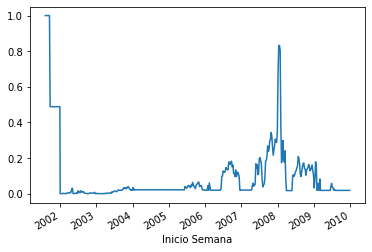

In [ ]:
df['Preço Leve'].plot()

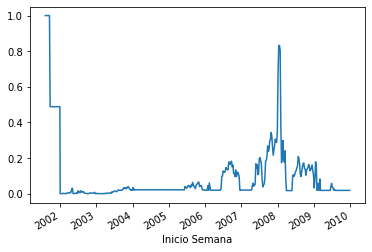

In [ ]:
df['Preço Leve'].plot()

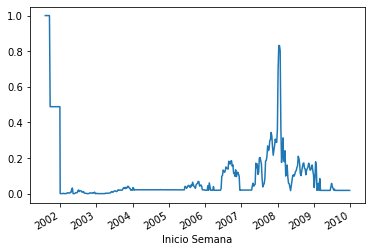

In [ ]:
df['Preço Médio'].plot()